In [1]:
from sqlalchemy import create_engine
import dotenv
import os
import pandas as pd

dotenv.load_dotenv(override=True)
username = os.getenv('username')
password = os.getenv('password')
host = os.getenv('host')
dbname = os.getenv('dbname')

import pandas as pd
dbname = "AdventureWorksDW"
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query = """SELECT *
        FROM dimproduct
        """
df = pd.read_sql(query, db_engine)

In [3]:
df.head(5)

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,None,None,Adjustable Race,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
1,2,BA-8327,NaN,None,None,Bearing Ball,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
2,3,BE-2349,NaN,None,None,BB Ball Bearing,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
3,4,BE-2908,NaN,None,None,Headset Ball Bearings,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
4,5,BL-2036,NaN,None,None,Blade,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current


In [7]:
df.DealerPrice.round(1)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
601     60.7
602     72.9
603    324.0
604    324.0
605    324.0
Name: DealerPrice, Length: 606, dtype: float64

In [8]:
df.DealerPrice.describe()

count     395.000000
mean      448.597060
std       503.225071
min         1.374000
25%        41.994000
50%       218.454000
75%       722.594900
max      2146.962000
Name: DealerPrice, dtype: float64

In [10]:
df_clip = df.DealerPrice.clip(lower=0, upper=2000)

In [12]:
df_clip.describe()

count     395.000000
mean      446.078675
std       495.074294
min         1.374000
25%        41.994000
50%       218.454000
75%       722.594900
max      2000.000000
Name: DealerPrice, dtype: float64

<Axes: ylabel='Frequency'>

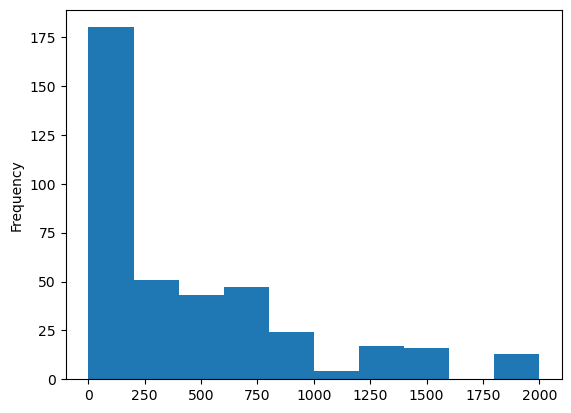

In [16]:
df_clip.plot(kind ="hist")

In [24]:
import numpy as np 

years = 5 
guadagni = pd.DataFrame(
    {"Mese": list("GFMAMGLASOND"*years), "Anno": np.repeat(list(range(years)), 12),"Guadagni": np.random.randint(800, 5000, 12*years)})

In [20]:
#%pip install Numpy

In [25]:
guadagni

,Mese,Anno,Guadagni
0,G,0,2889
1,F,0,2274
2,M,0,4470
3,A,0,2415
4,M,0,1085
5,G,0,1877
6,L,0,1325
7,A,0,1211
8,S,0,1227
9,O,0,2140


In [27]:
guadagni.Guadagni.cumsum()

0       2889
1       5163
2       9633
3      12048
4      13133
5      15010
6      16335
7      17546
8      18773
9      20913
10     21969
11     26340
12     30788
13     33317
14     37670
15     42563
16     47490
17     48745
18     53219
19     55645
20     58572
21     62026
22     63971
23     65264
24     67218
25     68402
26     72915
27     75376
28     78233
29     80539
30     84626
31     89529
32     90759
33     95702
34     96541
35    101436
36    104434
37    107899
38    109903
39    114840
40    117284
41    120734
42    121787
43    123978
44    127088
45    130905
46    133893
47    137844
48    138841
49    143590
50    144962
51    146160
52    149547
53    152475
54    153905
55    158424
56    163327
57    164600
58    166690
59    167515
Name: Guadagni, dtype: int32

In [32]:
guadagni.groupby("Anno").Guadagni.cumsum()

0      2889
1      5163
2      9633
3     12048
4     13133
5     15010
6     16335
7     17546
8     18773
9     20913
10    21969
11    26340
12     4448
13     6977
14    11330
15    16223
16    21150
17    22405
18    26879
19    29305
20    32232
21    35686
22    37631
23    38924
24     1954
25     3138
26     7651
27    10112
28    12969
29    15275
30    19362
31    24265
32    25495
33    30438
34    31277
35    36172
36     2998
37     6463
38     8467
39    13404
40    15848
41    19298
42    20351
43    22542
44    25652
45    29469
46    32457
47    36408
48      997
49     5746
50     7118
51     8316
52    11703
53    14631
54    16061
55    20580
56    25483
57    26756
58    28846
59    29671
Name: Guadagni, dtype: int32

In [33]:
guadagni["guadagni_anno"] = guadagni.groupby("Anno").Guadagni.cumsum()

In [37]:
fb = pd.read_csv("./beginner_datasets/facebook.csv")

In [38]:
fb.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [39]:
fb.status_published = pd.to_datetime(fb.status_published)

In [42]:
# per utilizzare metodi di una series datetime devo entrare nella classe dt
fb.status_published.dt.year

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
7045    2016
7046    2016
7047    2016
7048    2016
7049    2016
Name: status_published, Length: 7050, dtype: int32

In [48]:
d1 = fb.status_published.loc[0]
d10 = fb.status_published.loc[10]
days = d1 - d10
d1,d10, days

(Timestamp('2018-04-22 06:00:00'),
 Timestamp('2018-04-10 01:01:00'),
 Timedelta('12 days 04:59:00'))

In [52]:
delta = days

# pd.Timedelta mi da la possibilità di assegnare interi a datetime 
filtro = pd.Timedelta(days=19)
delta > filtro

False

In [53]:
fb.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [54]:
#controllo quante volte ci sono i valori status_type video,photo,link,status
fb.status_type.value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [57]:
fb.sample(7)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2185,246675545449582_272692246181245,photo,2012-09-30 10:21:00,14,6,0,14,0,0,0,0,0
5966,614855718638584_662089490581873,video,2017-11-29 07:07:00,36,0,0,36,0,0,0,0,0
5420,614855718638584_738956976228457,photo,2018-02-21 00:05:00,21,1,0,21,0,0,0,0,0
3328,134115277150304_204502323444932,photo,2017-12-13 05:08:00,225,17,3,212,11,2,0,0,0
6813,1050855161656896_1387570374652038,photo,2017-09-05 13:11:00,134,20,4,98,0,4,32,0,0
5908,614855718638584_665920573532098,video,2017-12-04 08:22:00,22,2,0,22,0,0,0,0,0
35,246675545449582_1599393216844468,photo,2018-03-05 02:48:00,293,8,0,281,11,1,0,0,0
